# Diabetes Regression using PyTorch Neural Network
In this task I build a neural network using PyTorch to predict diabetes progression based on a diabetes dataset. At the end I evaluate the model's performance and plot the training and test MSE over epochs.

# Libraries to import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [3]:
df = load_diabetes()
X, y = df.data, df.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Convert to pytorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [9]:
# Create dataloader objects
train_df = TensorDataset(X_train_tensor, y_train_tensor)
test_df = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_df, batch_size=64, shuffle=True)
test_loader = DataLoader(test_df, batch_size=64, shuffle=True)

# Neural Network 
My nn model consists of an input layer that takes in ten features from the dataset, followed by two hidden layers. The first hidden layer has 64 neurons, and the second has 32 neurons, both using the ReLU activation function to introduce non-linearity and improve learning. The final output layer consists of a single neuron without an activation function, as this is a regression task requiring continuous output values

In [ ]:
class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  
        return x  

Outputs: None
Targets: tensor([[ 71.],
        [248.],
        [182.],
        [ 75.],
        [244.],
        [237.],
        [283.],
        [103.],
        [292.],
        [ 71.],
        [ 91.],
        [ 71.],
        [259.],
        [192.],
        [178.],
        [229.],
        [332.],
        [ 49.],
        [242.],
        [281.],
        [ 43.],
        [ 77.],
        [182.],
        [ 90.],
        [ 65.],
        [200.],
        [200.],
        [109.],
        [261.],
        [275.],
        [ 53.],
        [150.],
        [ 31.],
        [310.],
        [258.],
        [245.],
        [170.],
        [190.],
        [277.],
        [ 68.],
        [118.],
        [ 97.],
        [249.],
        [321.],
        [245.],
        [152.],
        [268.],
        [139.],
        [279.],
        [ 69.],
        [ 94.],
        [ 65.],
        [265.],
        [185.],
        [303.],
        [201.],
        [ 57.],
        [173.],
        [ 79.],
        [ 95.],
        [ 39.],
 

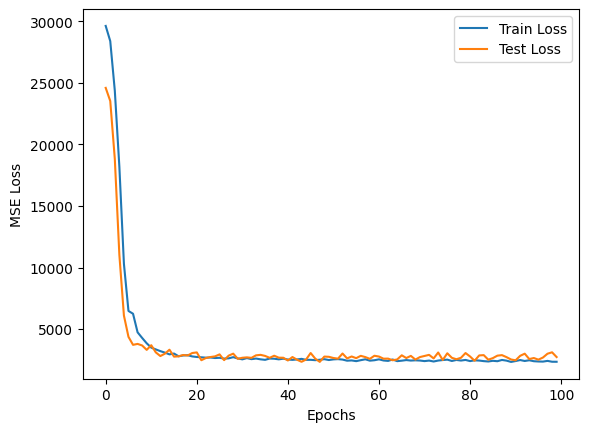

In [ ]:
# Instantiate model, loss function, and optimizer
model = DiabetesNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Final model evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    final_mse = criterion(y_pred, y_test_tensor).item()

print(f"Final Test MSE: {final_mse:.4f}")

# Plot training and test loss
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

Conclusion

The model seems to generalize well as MSE on the test set is approximately 2761, which aligns well with the expected value of ~3000 given by the professor